In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [247]:
train_data = pd.DataFrame(pd.read_csv("train.csv",header=None))

train_labels = pd.DataFrame(pd.read_csv("trainLabels.csv",header=None))

test_data = pd.DataFrame(pd.read_csv("test.csv",header=None))

In [147]:
train_data[train_data.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39


In [148]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

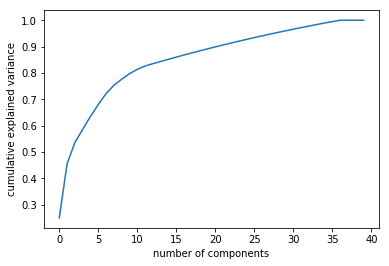

In [149]:
pca = PCA().fit(train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [150]:
print("%s labels = 0" %(train_labels[train_labels[0] == 0].count()[0]))
print('%s labels = 1' %(train_labels[train_labels[0] == 1].count()[0]))

490 labels = 0
510 labels = 1


In [258]:
X = preprocessing.scale(train_data, axis=0)

test_data = preprocessing.scale(test_data, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, train_labels, random_state = 7, test_size = 0.25)

In [260]:
X.shape

(1000, 40)

## LogisticRegression

In [127]:
clf = LogisticRegression(solver='liblinear',max_iter=100, random_state=42)

In [128]:
clf.fit(X,train_labels)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
pred_y = pd.DataFrame(clf.predict(test_data))

In [134]:
pred_y.columns = ['Solution']

pred_y['Id'] = 1

for i in range(len(pred_y)):
    pred_y['Id'][i] = i+1

pred_y = pred_y[['Id','Solution']]

pred_y.to_csv('pred.csv', sep=',',index_label='Id',index=False)

## XGB

In [226]:
pca = PCA(20)
X = pca.fit_transform(X)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, train_labels, random_state = 7, test_size = 0.25)

In [228]:
eval_set =  [(X_test, y_test)]
model = XGBClassifier(n_estimators=1000, learning_rate=0.2)
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
          eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.765399
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.7774
[2]	validation_0-auc:0.80823
[3]	validation_0-auc:0.808036
[4]	validation_0-auc:0.815347
[5]	validation_0-auc:0.810203
[6]	validation_0-auc:0.818517
[7]	validation_0-auc:0.817999
[8]	validation_0-auc:0.819067
[9]	validation_0-auc:0.821623
[10]	validation_0-auc:0.828157
[11]	validation_0-auc:0.825893
[12]	validation_0-auc:0.824664
[13]	validation_0-auc:0.827349
[14]	validation_0-auc:0.82696
[15]	validation_0-auc:0.829225
[16]	validation_0-auc:0.830648
[17]	validation_0-auc:0.830325
[18]	validation_0-auc:0.83466
[19]	validation_0-auc:0.836245
[20]	validation_0-auc:0.837021
[21]	validation_0-auc:0.837992
[22]	validation_0-auc:0.839739
[23]	validation_0-auc:0.841615
[24]	validation_0-auc:0.841486
[25]	validation_0-auc:0.839997
[26]	validation_0-auc:0.839545
[27]	validation_0-auc:0.842909
[28]	validation_0-auc:0.844526
[29]	validation_0-auc:0.845432
[30]	validation_0-auc

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[84]	validation_0-auc:0.869695
[85]	validation_0-auc:0.869759
[86]	validation_0-auc:0.869436
[87]	validation_0-auc:0.869889
[88]	validation_0-auc:0.868724
[89]	validation_0-auc:0.868854
[90]	validation_0-auc:0.869824
[91]	validation_0-auc:0.870471
[92]	validation_0-auc:0.869501
[93]	validation_0-auc:0.868854
Stopping. Best iteration:
[83]	validation_0-auc:0.8706



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [229]:
y_pred = model.predict(X_test)

In [230]:
accuracy = accuracy_score(y_test, y_pred )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.20%


In [231]:
test_data = pca.fit_transform(test_data)

In [232]:
pred_y = pd.DataFrame(model.predict(test_data))

In [233]:
pred_y.columns = ['Solution']

pred_y['Id'] = 1

for i in range(len(pred_y)):
    pred_y['Id'][i] = i+1

pred_y = pred_y[['Id','Solution']]

pred_y.to_csv('pred.csv', sep=',',index_label='Id',index=False)

## GBM

In [270]:
from sklearn.ensemble import GradientBoostingClassifier

In [271]:
clf = GradientBoostingClassifier(n_estimators=500,max_depth=10,min_samples_split=5,min_samples_leaf=3)

In [272]:
clf.fit(X,train_labels)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [254]:
pred_y = clf.predict(X_test)

In [255]:
accuracy = accuracy_score(y_test, pred_y )
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.80%


In [273]:
pred_y = pd.DataFrame(clf.predict(test_data))

In [274]:
pred_y.columns = ['Solution']

pred_y['Id'] = 1

for i in range(len(pred_y)):
    pred_y['Id'][i] = i+1

pred_y = pred_y[['Id','Solution']]

pred_y.to_csv('pred.csv', sep=',',index_label='Id',index=False)